In [1]:
from collections import Counter
from glob import glob 
from utils.cleaner import cleanTexts
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from glob import glob 


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marcosnunez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/marcosnunez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
path =  "data/dataset"
data = cleanTexts(path,lematizer = False,stopword=True,steaming = False,extractor=False)
file_pi = open('dataCleaned.obj', 'wb') 
pickle.dump(data, file_pi)

In [24]:
filehandler = open("dataCleanedS.obj", 'rb') 
data = pickle.load(filehandler)
df = pd.DataFrame({},columns=["text","class","name"])
for i in range(len(data)):
        df = df.append(pd.DataFrame(data[i], columns=df.columns),ignore_index=True)

In [28]:
texts = df[df["class"]==1]["text"].to_numpy().flatten()
textClass = ""
for elem in texts:
    textClass+=elem
textClass = textClass.split(" ")

In [29]:
from collections import Counter


 # equals to list(set(words))
 #
dfFiltered = pd.DataFrame({},columns=["word","count"])
dfFiltered["word"] = list(Counter(textClass).keys())
dfFiltered["count"] = list(Counter(textClass).values())
dataFiltered = dfFiltered.sort_values(by="count",ascending=False).head(5)

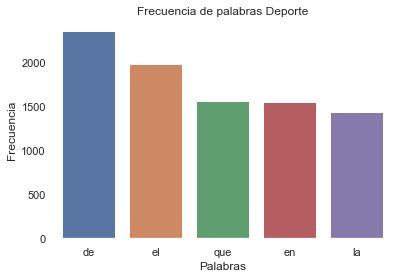

In [30]:
sns.set(font_scale=1) 
ax = sns.barplot(x="word", y="count", data=dataFiltered)
ax.set(xlabel='Palabras', ylabel='Frecuencia')
ax.set_title("Frecuencia de palabras Deporte")
ax.patch.set_alpha(0.0)
ax.figure.savefig('plots/PalabrasConStopWordsDeporte.png',dpi=600)

## Ordenamiento de los documentos mas representativos de una temática

In [8]:
df = pd.read_csv("modelResults.csv")
df[df["realClass"]==1].sort_values(["class1","realClass","method"],ascending=False).head(5)

,Unnamed: 0,method,class1,class2,class3,realClass,Name
0,0,bayes,1.0,9.855478e-40,1.679645e-58,1,D3.txt
3,3,bayes,1.0,3.401508e-46,1.496907e-50,1,D56.txt
6,6,bayes,1.0,2.856555e-53,2.588753e-63,1,D68.txt
9,9,bayes,1.0,4.273432e-25,9.475210e-38,1,D42.txt
12,12,bayes,1.0,3.706276e-40,1.144355e-60,1,D72.txt


In [13]:
df[df["realClass"]==2].sort_values(["class2","realClass","method"],ascending=False).head(5)

,Unnamed: 0,method,class1,class2,class3,realClass,Name
1,1,bayes,8.558254e-106,1.0,3.623907e-117,2,S81.txt
4,4,bayes,3.015528e-46,1.0,1.085235e-73,2,S7.txt
7,7,bayes,5.213558e-59,1.0,2.212258e-67,2,S71.txt
10,10,bayes,7.065918e-26,1.0,7.522958e-61,2,S90.txt
13,13,bayes,1.966863e-61,1.0,4.973073e-91,2,S38.txt


In [14]:
df[df["realClass"]==3].sort_values(["class3","realClass","method"],ascending=False).head(5)

,Unnamed: 0,method,class1,class2,class3,realClass,Name
2,2,bayes,1.532513e-35,2.074907e-36,1.0,3,P5.txt
5,5,bayes,4.461722e-64,1.345630e-80,1.0,3,P78.txt
8,8,bayes,3.181291e-26,1.770557e-63,1.0,3,P69.txt
17,17,bayes,1.092422e-37,3.530787e-25,1.0,3,P32.txt
20,20,bayes,5.104401e-99,3.974608e-124,1.0,3,P66.txt


Veamos ahora con regresion

In [15]:
df = df[df["method"]=="regresion"]
df[df["realClass"]==1].sort_values(["class1","realClass","method"],ascending=False).head(5)

,Unnamed: 0,method,class1,class2,class3,realClass,Name
159,159,regresion,0.679220,0.154224,0.166556,1,D3.txt
126,126,regresion,0.667846,0.131561,0.200593,1,D62.txt
174,174,regresion,0.659702,0.135066,0.205232,1,D52.txt
90,90,regresion,0.652734,0.138832,0.208434,1,D6.txt
138,138,regresion,0.652734,0.138832,0.208434,1,D73.txt


In [16]:
df[df["realClass"]==2].sort_values(["class2","realClass","method"],ascending=False).head(5)

,Unnamed: 0,method,class1,class2,class3,realClass,Name
118,118,regresion,0.139091,0.741506,0.119404,2,S22.txt
172,172,regresion,0.154159,0.708572,0.137269,2,S6.txt
103,103,regresion,0.162097,0.698061,0.139841,2,S38.txt
175,175,regresion,0.164849,0.694286,0.140865,2,S69.txt
178,178,regresion,0.152805,0.693185,0.154010,2,S83.txt


In [17]:
df[df["realClass"]==3].sort_values(["class3","realClass","method"],ascending=False).head(5)

,Unnamed: 0,method,class1,class2,class3,realClass,Name
110,110,regresion,0.150040,0.103077,0.746883,3,P66.txt
146,146,regresion,0.144588,0.109606,0.745805,3,P25.txt
95,95,regresion,0.159653,0.114990,0.725357,3,P78.txt
113,113,regresion,0.150051,0.133454,0.716495,3,P81.txt
134,134,regresion,0.156573,0.153819,0.689607,3,P57.txt
